# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Manalo Jr., Darwin

_Student No._: 2022-10113

_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Oct. 6, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name**: Darwin P. Manalo Jr.

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [18]:
import numpy as np # Using the numpy package
from numpy import array, matmul # Getting the necessary operations from numpy
from numpy.linalg import eigh, norm, inv
# Importing the important function for the eigenvalues and eigenvectors of matrices
# Setting up the array for the given matrix A
A = array([[8,-2,-20], [-2,-3,-9], [-20,-9,-3]])
# We will use eigh to get the eigenvalues and eigenvectors since the matrix A is symmetric
x,V = eigh(A)
# Printing the eigenvalues and eigenvectors of A
print("Eigenvalues of A\n", x)
print("Eigenvectors of A\n", V)
# Let D be the diagonal matrix with the eigenvalues
D = np.diag(x)
print("Diagonal matrix with the eigenvalues of A\n", D)
# Checking if A = VDV^-1 where V^-1 is the inverse of V
V_0 = inv(V)
A_2 = matmul(matmul(V,D), V_0)
# Checking if AV = VD by matrix multiplication
print("AV\n", matmul(A,V)) # Printing the output for AV
print("VD\n", matmul (V,D)) # Printing the output for VD
# Checking if A = VDV^-1
print("matrix A\n", A) # Printing the output for A
print("matrix VDV^-1\n", A_2) # Printing the output for VDV^-1
# Calculating the errors
print("Percent error for AV is\n", norm(matmul(A,V)-matmul(V,D))/norm(matmul(V,D))) # Calculating the error via Frobenius norm as AV and VD as the experimental and theoretical values, respectively
print("Percent error for VD is\n", norm(matmul(V,D)-matmul(A,V))/norm(matmul(A,V))) # Calculating the error via Frobenius norm as AV and VD as the theoretical and experimental values, respectively
print("Percent error using inverse is", norm(A-matmul(matmul(V,D), inv(V)))/norm(A)) # Calculating the error using the Frobenius norm of the inverse of V

Eigenvalues of A
 [-21.99606195   0.16021522  23.83584674]
Eigenvectors of A
 [[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]
Diagonal matrix with the eigenvalues of A
 [[-21.99606195   0.           0.        ]
 [  0.           0.16021522   0.        ]
 [  0.           0.          23.83584674]]
AV
 [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
VD
 [[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
matrix A
 [[  8  -2 -20]
 [ -2  -3  -9]
 [-20  -9  -3]]
matrix VDV^-1
 [[  8.  -2. -20.]
 [ -2.  -3.  -9.]
 [-20.  -9.  -3.]]
Percent error for AV is
 3.1023925402670955e-16
Percent error for VD is
 3.1023925402670955e-16
Percent error using inverse is 3.009873772223033e-16


In the results, we can verify that AV is indeed equal to VD

### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

Solution of x for c=2 is x= 0.7984747083247583


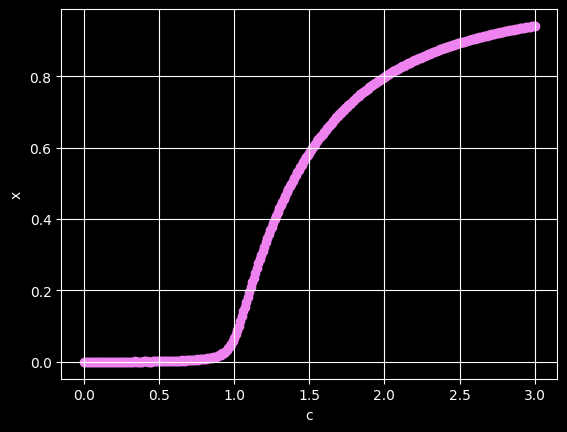

In [19]:
from math import exp # For the exponential function
from numpy import array, linspace # For the array of the matrix and the linspace that returns that array of values
import matplotlib.pyplot as plt # For plotting the necessary plot

def f(x, c): # Defining the given function
  return 1-exp(-c*x)
# x_prev = initial value of x
# x_new = new value of x
E = 1*exp(-6) # The given accuracy and the stop interval for the loop
def relaxation_method(x, c, E): # Solving for the error of Newton's method
  x_prev = x
  x_new = f(x, c)
  while (abs(x_new - x_prev)) > E:
    x_new, x_prev = f(x_new, c), x_new
  return x_new
# For c = 2, we can get the solution by relaxation method
print("Solution of x for c=2 is x=", relaxation_method(1, 2, E))
c_values = linspace(0, 3, 300+1) # The values of c from 0 to 3 in steps of 0.01
s_values = array([relaxation_method(1, i, E) for i in c_values]) # The solution of x at each value of c
# Plotting the graph of x as function of c
plt.style.use('dark_background')
plt.scatter(c_values, s_values, color = "violet")
plt.xlabel("c")
plt.ylabel("x")
plt.grid()
plt.show()



There is a clear transition from x=0 regime to a regime of nonzero values of x so as c has the values less than 1, the values of x stays at zero. Meanwhile, as c approaches 1, we can see the exponential growth for the values of x as it also approaches the value of 1.

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

**SOLUTION**

The general form of the function in Newton's method is f(x)=0.\\
So, before applying the Newton's Method, we should convert the given function in terms of f(x)=0 by subtracting the equation by the term $ω^2r$ on both sides. Thus, the equation is now $$\frac{GM}{r^2}-\frac{Gm}{(R-r)^2}-w^2r=0$$


In [11]:
import math
# True values of the parameters were given
G = 6.674e-11 # Newton's Gravitational Constant
M = 5.974e24 # Mass of the Earth
m = 7.348e22 # Mass of the moon
R = 3.844e8 # Distance from the Earth to the Moon
w = 2.662e-6 # Angular velocity of both the Moon and the satellite
starting_r = 3e7 # Starting value for r
sigfigs = 4 # Accuracy required is at least 4 significant figures

def f(r): # Defining the given function
  return (G*M/r**2 - G*m/(R-r)**2)-w**2*r
def df(r): # Taking the first derivative w/ respect to r: df/dr
  return (-2*G*M/r**3 - 2*G*m/(R-r)**3)-w**2

# Let r_int be the starting point value, r_pre and r_new be the previous and new distance, respectively, from earth to the satellite
# Calculating for the errors in Newton's method
def newtons_method(r_int, E):
  r_pre = r_int
  r_new = r_int - f(r_int)/df(r_int) # Formula for the Newton's method
  while (abs(r_new - r_pre) > 10**(math.floor(math.log10(r_new))-(E-1))): # Program the method until the difference between estimates is smaller than E
    r_new, r_pre = r_new - f(r_new)/df(r_new), r_new
  return r_new
print(newtons_method(starting_r, sigfigs))

326045071.7734316
